Girt hypothesis to prove inbetween the variables:
x:
Work instrumental support expectations (T1) 
Work relational support expectations (T1) 
Work role overload (T1) 
Work emotional demands (T1)

y:
Work role adjustment (T1)

The columns from above depicts the image in the paper, which translates to the following columns on the data:

x
(positive)
wcowinsexphelp 1 
wallcowexp1
____________
average_wcowinsexphelp
average_wallcowexp

(negative)
roleover1
wemotdem 1
___________
average_roleover
average_wemotdem
y:
workadj1
________
average_workadj


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the CSV
file_path = "preprocessed_data.csv"  
data = pd.read_csv(file_path)

# Step 2: Filter Columns
# Specifying the columns that I want to keep for ML model
selected_columns = ['average_wcowinsexphelp', 'average_wallcowexp', 'average_roleover', 'average_wemotdem','average_workadj']  
filtered_data = data[selected_columns]

In [2]:
filtered_data.head

<bound method NDFrame.head of      average_wcowinsexphelp  average_wallcowexp  average_roleover  \
0                      4.25            2.416667          3.666667   
1                      4.25            3.416667          4.000000   
2                      2.75            2.500000          4.000000   
3                      5.00            4.166667          3.000000   
4                      4.25            4.000000          3.333333   
..                      ...                 ...               ...   
574                    4.50            3.916667          3.666667   
575                    2.00            1.000000          3.666667   
576                    4.00            4.000000          2.000000   
577                    5.00            4.750000          5.000000   
578                    4.25            4.500000          4.333333   

     average_wemotdem  average_workadj  
0                 4.4         3.777778  
1                 3.2         4.444444  
2                 

Correlation Matrix

In [3]:
correlation_matrix = filtered_data.corr(method='pearson')  
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                         average_wcowinsexphelp  average_wallcowexp  \
average_wcowinsexphelp                1.000000            0.486840   
average_wallcowexp                    0.486840            1.000000   
average_roleover                      0.303350            0.181447   
average_wemotdem                      0.490505            0.406907   
average_workadj                       0.250495            0.353017   

                        average_roleover  average_wemotdem  average_workadj  
average_wcowinsexphelp          0.303350          0.490505         0.250495  
average_wallcowexp              0.181447          0.406907         0.353017  
average_roleover                1.000000          0.389558        -0.069741  
average_wemotdem                0.389558          1.000000         0.125785  
average_workadj                -0.069741          0.125785         1.000000  


Correlation Matrix filtered to check the relation between each X and y

In [4]:

correlations = filtered_data.corr()["average_workadj"].sort_values(ascending=False)
# Display correlation of each feature with the target
print("Correlation of features with workadj1  :")
print(correlations)

Correlation of features with workadj1  :
average_workadj           1.000000
average_wallcowexp        0.353017
average_wcowinsexphelp    0.250495
average_wemotdem          0.125785
average_roleover         -0.069741
Name: average_workadj, dtype: float64


The correlation values represent how closely related various features are to the variable workadj1, which likely measures work adjustment:

average_workadj (1.000): This is perfectly correlated with itself, as expected for any variable compared to itself.
average_wallcowexp (0.353): Positive correlation suggests that higher levels of all coworkers' experience are moderately associated with better work adjustment.
average_wcowinsexphelp (0.250): Positive correlation indicates that more coworkers’ instrumental experience in providing help is weakly linked to better work adjustment.
average_wemotdem (0.126): Slight positive correlation implies that higher emotional demands have a minimal positive association with work adjustment.
average_roleover (-0.070): Negative correlation indicates that higher role overload is weakly associated with poorer work adjustment.
In summary, the strongest positive association is with coworkers' experience, while role overload is the only factor negatively associated with work adjustment.

ML modeling

In [5]:
# Features and target
X = filtered_data.drop(columns=['average_workadj'])
y = filtered_data['average_workadj']


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.29


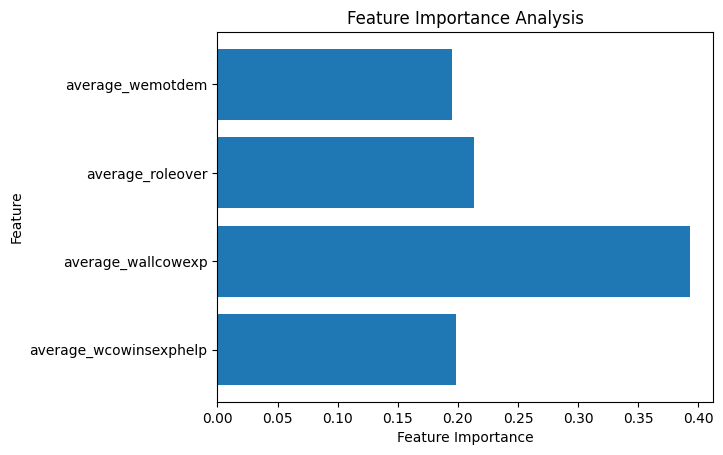

In [32]:
import matplotlib.pyplot as plt

# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Analysis")
plt.show()


In [33]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and MSE
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f"Tuned Mean Squared Error: {mse_tuned:.2f}")


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Tuned Mean Squared Error: 0.27


Updating the hyperpameters to the best possible set of values:

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Tuned Mean Squared Error: 0.27


Reason being the current value of MSE is 0.29
and after the grid search the possible mse value has dropped to 0.27

In [7]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(random_state=42, max_depth=5, min_samples_leaf=2, min_samples_split=2,n_estimators=50)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.27


In [9]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.2/124.9 MB 3.0 MB/s eta 0:00:42
   ---------------------------------------- 0.7/124.9 MB 5.3 MB/s eta 0:00:24
   ---------------------------------------- 1.2/124.9 MB 6.9 MB/s eta 0:00:18
    --------------------------------------- 1.8/124.9 MB 8.6 MB/s eta 0:00:15
    --------------------------------------- 2.6/124.9 MB 9.6 MB/s eta 0:00:13
   - -------------------------------------- 3.5/124.9 MB 11.2 MB/s eta 0:00:11
   - -------------------------------------- 4.4/124.9 MB 12.4 MB/s eta 0:00:10
   - -------------------------------------- 5.3/124.9 MB 13.0 MB/s eta 0:00:10
   - -------------------------------------- 6.1/124.9 MB 13.5 MB/s eta 0:00:09
   -- ------------------------------------- 7.0/124.9 MB 14.0 MB/s eta 0:00:09
   -- ------------------------------------- 7.3/124.9 MB 13.7 MB/s eta 0:


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: C:\Users\reema\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


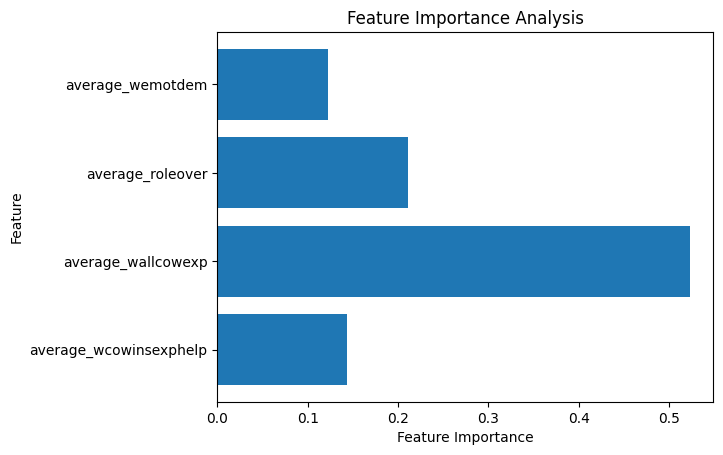

In [42]:

# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Analysis")
plt.show()

Cross-Validation
Use cross-validation to ensure the model performs consistently across different subsets of the data.

In [43]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f"Cross-Validated Mean Squared Error: {cv_mse:.2f}")


Cross-Validated Mean Squared Error: 0.33


 Check for Overfitting
Compare training and testing errors. If the training error is much lower, your model might be overfitting

In [44]:
# Training error
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Training Mean Squared Error: {mse_train:.2f}")


Training Mean Squared Error: 0.25


These metrics provide insight into the model's performance:

Training Mean Squared Error (MSE: 0.25): The model performs well on the training dataset, with an average squared error of 0.25. This measures how closely the model's predictions align with the actual training data.

Cross-Validated Mean Squared Error (MSE: 0.33): Using cross-validation, the model's average error on unseen data is slightly higher than on the training set. This suggests that the model generalizes reasonably well but may be slightly overfitting.

Actual Model MSE (MSE: 0.27): On a final evaluation dataset, the model achieves an MSE of 0.27, which is between the training and cross-validation errors. This indicates that the model's performance is consistent across datasets and validates its reliability.

Interpretation:
The relatively close values across training, cross-validation, and actual performance indicate that the model is neither underfitting nor severely overfitting.
The gap between training and cross-validated errors (0.08) is small, highlighting that the model's performance does not degrade significantly on unseen data

In [45]:
import pandas as pd
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
print(feature_importances)


                  Feature  Importance
1      average_wallcowexp    0.522914
2        average_roleover    0.211191
0  average_wcowinsexphelp    0.143708
3        average_wemotdem    0.122187


Global Correlation Insights

While Random Forests are non-linear models, you can compute Pearson correlation coefficients between each feature and the target (workadj1) to check for linear relationships.

In [46]:
correlations = X.join(y).corr()['average_workadj']
print(correlations.sort_values(ascending=False))


average_workadj           1.000000
average_wallcowexp        0.353017
average_wcowinsexphelp    0.250495
average_wemotdem          0.125785
average_roleover         -0.069741
Name: average_workadj, dtype: float64


This summary shows the correlations of various factors with average_workadj (work adjustment):

Strong Positive Correlation:
average_workadj (1.000): Perfect correlation with itself.

Moderate Positive Correlation:
average_wallcowexp (0.353): Coworkers' overall experience moderately relates to better work adjustment.

Weak Positive Correlation:
average_wcowinsexphelp (0.250): Coworkers’ instrumental experience in providing help has a weak positive association with work adjustment.
average_wemotdem (0.126): Emotional demands slightly contribute to better work adjustment.

Weak Negative Correlation:
average_roleover (-0.070): Role overload is weakly linked to poorer work adjustment.

Summary: Work adjustment is most influenced by coworkers' overall experience, with weaker associations from instrumental help and emotional demands. Role overload slightly hinders work adjustment.

In [ ]:
!pip install shap


 SHAP Values (SHapley Additive exPlanations)
SHAP values explain the output of a machine learning model by assigning each feature an importance value for each prediction. It provides a global view of feature impact as well as local explanations for individual predictions.

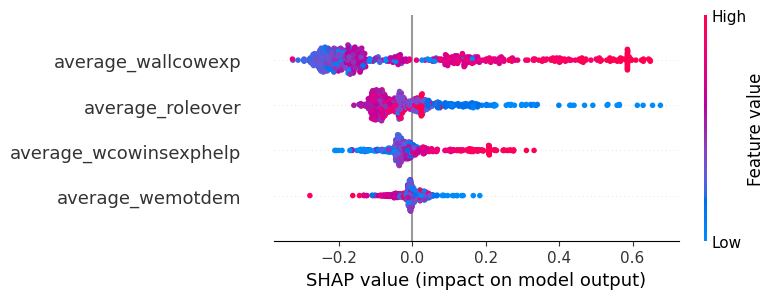

In [48]:
import shap

# Explain the model's predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Visualize global feature importance
shap.summary_plot(shap_values, X)


The SHAP (SHapley Additive exPlanations) summary plot shows the impact of four features on the model's output, with each point representing a data instance. Here’s a breakdown:

average_wallcowexp:

Higher values (pink) positively impact the model output, while lower values (blue) negatively impact it.
This feature has the strongest positive influence on the output.
average_roleover:

Higher values (pink) generally push the model output toward the negative side.
It has a negative impact on the model output, especially for higher values.
average_wcowinsexphelp:

Higher values (pink) show a slight positive influence, while lower values (blue) tend to push the output negatively.
The effect is relatively small but positive.
average_wemotdem:

Both low and high values have minimal impact on the output, centered around zero.
It is the least impactful feature among the four.
Summary:
Key Influencer: average_wallcowexp has the most significant positive impact.
Negative Impact: average_roleover reduces the model output.
Lesser Impact: average_wcowinsexphelp and average_wemotdem have smaller, mixed influences.


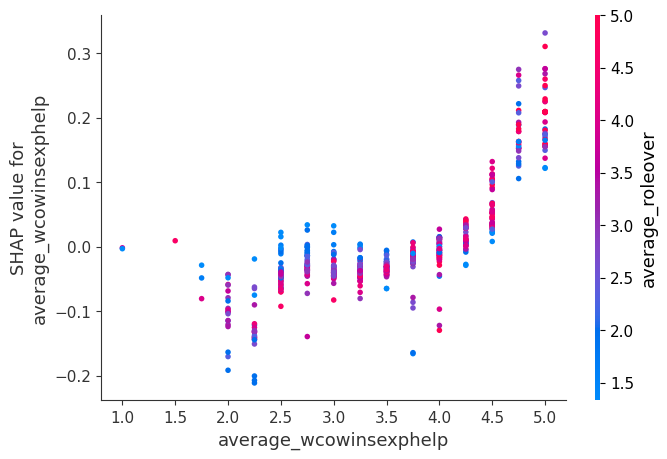

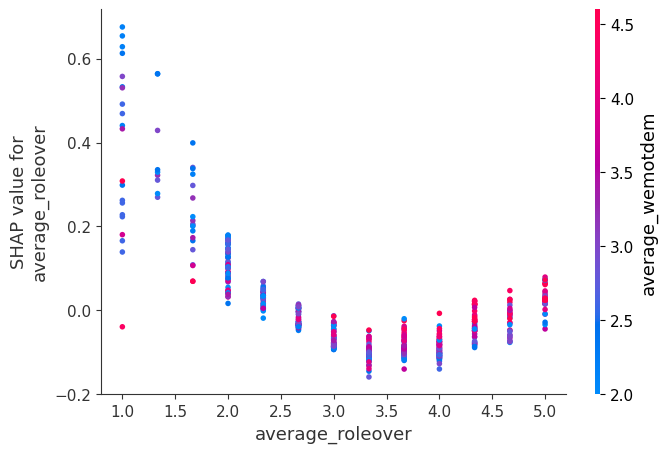

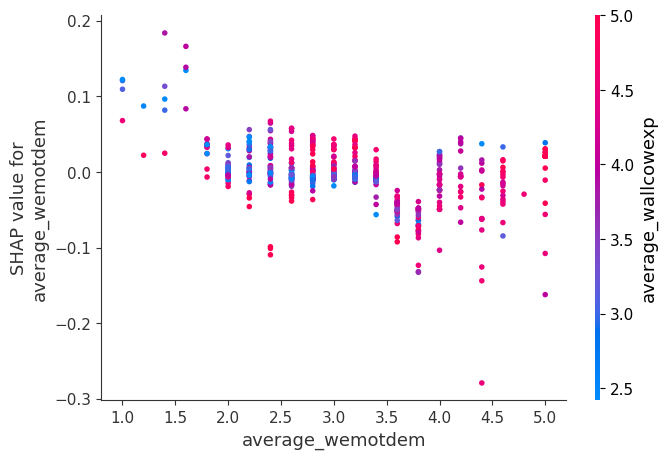

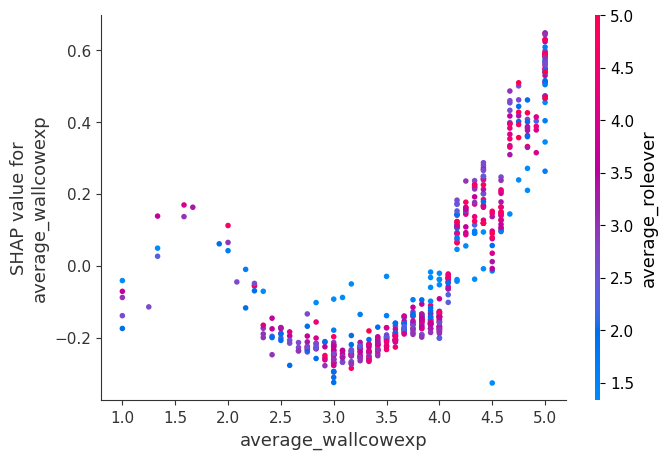

In [50]:
shap.dependence_plot('average_wcowinsexphelp', shap_values, X)
shap.dependence_plot('average_roleover', shap_values, X)
shap.dependence_plot('average_wemotdem', shap_values, X)
shap.dependence_plot('average_wallcowexp', shap_values, X)



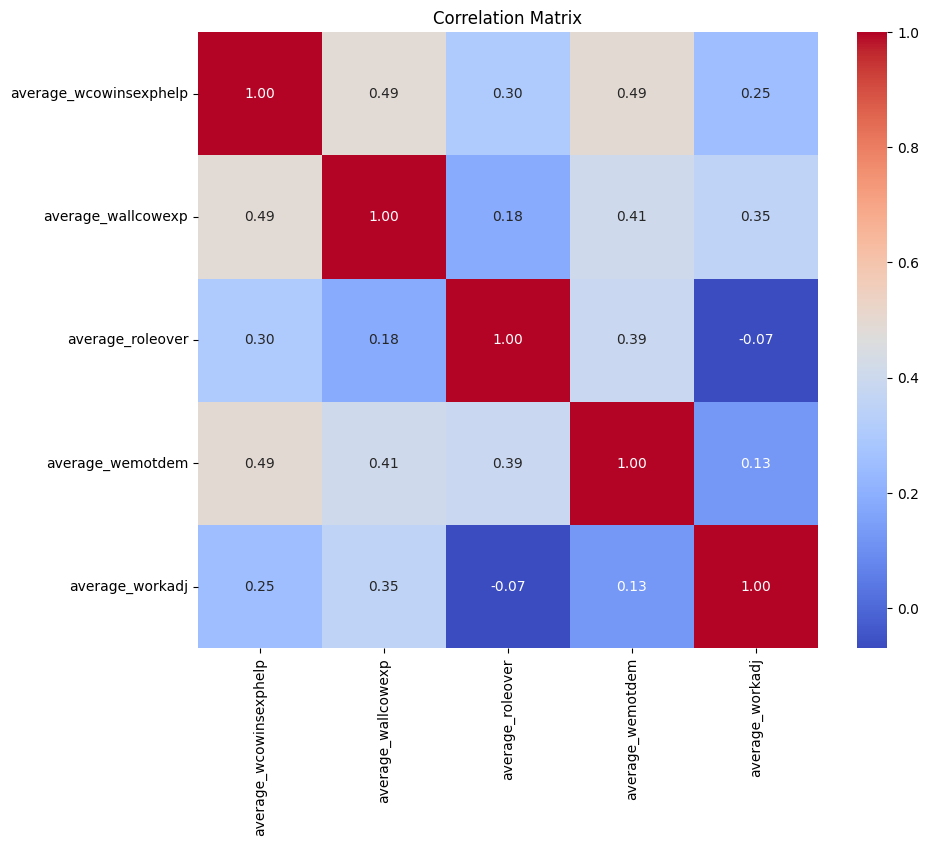

In [51]:
import seaborn as sns

# Compute correlation matrix
corr = X.join(y).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


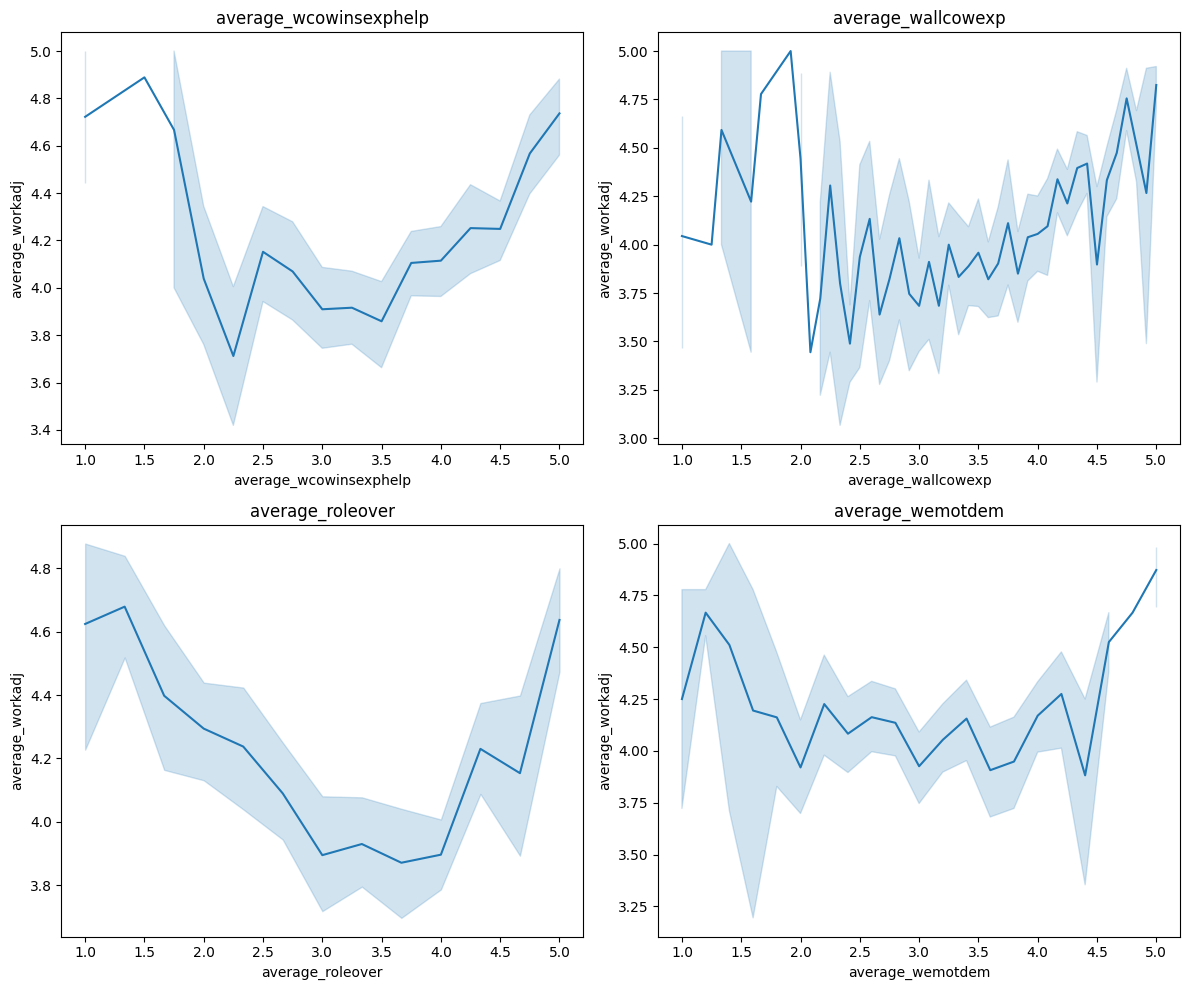

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# List of features to plot
features =['average_wcowinsexphelp', 'average_wallcowexp', 'average_roleover', 'average_wemotdem']  

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Loop through the features and plot each one in a subplot
for i, feature in enumerate(features):
    sns.lineplot(x=X[feature], y=y, ax=axs[i])
    axs[i].set_title(f"{feature}")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("average_workadj")

# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Show the plots
plt.show()


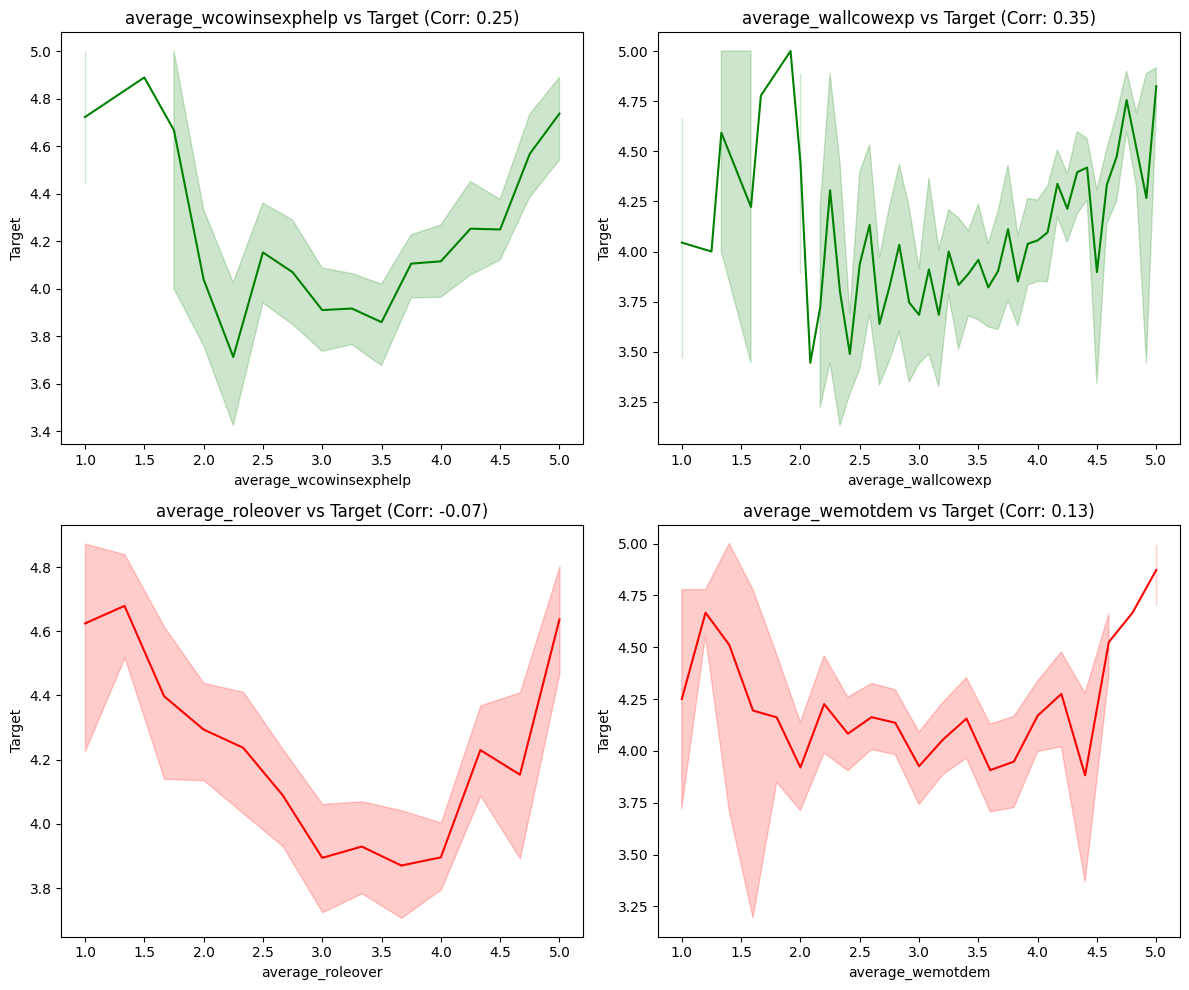

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the correlation between each feature and the target
correlations = X.corrwith(y)

# Create a 2x2 grid of subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# List of features to plot
features = ['average_wcowinsexphelp', 'average_wallcowexp', 'average_roleover', 'average_wemotdem']  

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Loop through the features and plot each one in a subplot
for i, feature in enumerate(features):
    # Get the correlation for the current feature
    corr = correlations[feature]
    
    # Set the color based on the correlation
    if corr > 0.2:
        color = 'green'  # Positive correlation
    elif corr < 0.2:
        color = 'red'    # Negative correlation
    else:
        color = 'blue'   # No correlation or neutral
    
    # Create a line plot
    sns.lineplot(x=X[feature], y=y, ax=axs[i], color=color)
    axs[i].set_title(f"{feature} vs Target (Corr: {corr:.2f})")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Target")

# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Show the plots
plt.show()


Alternative method:

XGBoost Overview:
XGBoost (eXtreme Gradient Boosting) is a powerful and efficient machine learning algorithm often used for regression and classification problems. It is based on gradient boosting and designed to maximize speed, performance, and accuracy.

Key Features of XGBoost:
Boosting: Combines multiple weak learners (decision trees) to form a strong learner.
Regularization: Includes L1 (Lasso) and L2 (Ridge) penalties to prevent overfitting.
Handling Missing Values: Automatically learns the optimal direction for missing data.
Parallel Processing: Efficiently uses CPU cores to train models faster.
Tree Pruning: Uses depth-first pruning to optimize model complexity.
Cross-Validation Support: Offers built-in k-fold cross-validation for better tuning.


How XGBoost Works:
Initial Prediction: Begins with a baseline prediction (e.g., mean for regression).
Iterative Training: Builds decision trees sequentially to minimize the residual errors of previous trees using gradient descent.
Objective Function:
The loss function + regularization terms to balance accuracy and model complexity.
Output: A weighted sum of the predictions from all weak learners (trees).
Common Parameters:

n_estimators: Number of boosting rounds (trees).
learning_rate: Step size for each boosting iteration (lower means slower but more accurate).
max_depth: Depth of each tree to control model complexity.
subsample: Fraction of samples used for training each tree.
colsample_bytree: Fraction of features considered for each tree.
gamma: Minimum loss reduction for a split.
reg_alpha & reg_lambda: Regularization terms to prevent overfitting.

Advantages of XGBoost:
High Accuracy: Performs exceptionally well in competitions and real-world data.
Fast Execution: Highly optimized for speed.
Versatile: Supports missing data, large datasets, and imbalanced data.
Flexible: Works with custom loss functions and evaluation metrics.


In [12]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor with parameters
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Use squared error for regression
    random_state=42,
    learning_rate=0.1,             # Step size shrinkage
    n_estimators=50,               # Number of boosting rounds (trees)
    max_depth=5,                   # Maximum depth of a tree
    min_child_weight=2,            # Minimum sum of instance weight for child nodes
    subsample=0.8,                 # Random fraction of data for training each tree
    colsample_bytree=0.8           # Fraction of features used per tree
)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.31


In [13]:
# Import libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the grid of hyperparameters
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'n_estimators': [50, 100, 200],      # Number of boosting rounds (trees)
    'max_depth': [3, 5, 7],              # Maximum depth of a tree
    'min_child_weight': [1, 2, 5],       # Minimum sum of instance weight for child nodes
    'subsample': [0.8, 1.0],             # Fraction of samples used for training each tree
    'colsample_bytree': [0.8, 1.0]       # Fraction of features used per tree
}

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use negative MSE for scoring
    cv=5,                              # Cross-validation folds
    verbose=2,                         # Show progress
    n_jobs=-1                          # Use all available CPUs
)

# Fit the model with Grid Search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Test Set): {mse:.2f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 0.8}
Mean Squared Error (Test Set): 0.29
